In [33]:
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

import mediapipe as mp
import glob
from collections import OrderedDict, defaultdict
from IPython.display import clear_output
import time
import os

In [2]:
def extract_imgs(video_fn, skip_frames=1):
    video=cv2.VideoCapture(video_fn)
    imgs=[]
    frame_count=0
    while(video.isOpened()):
        ret, frame = video.read()
        if ret==False: break
        if frame_count%skip_frames==0:
            imgs.append(frame)
        frame_count+=1
    video.release()
    return imgs

In [3]:
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
def extract_keypoints(image_rgb): 
    try:
        results = pose.process(image_rgb)
        landmarks=results.pose_landmarks.landmark
    except Exception as e:
        # print('Error file=', fn)
        # print('Error=', e)
        return np.zeros((33,2))
    xys=[]
    for landmark in landmarks:
        xys.append([landmark.x, landmark.y])
    xys=np.array(xys)
    return xys

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
def keypoints_helper(imgs):
    ret = []
    for img in imgs:
        out=extract_keypoints(img)
        if len(out)==0:
            out=extract_keypoints(img)
        
        out = out[:25].ravel()
        ret.append(out)
    return ret


def view_imgs_as_video(imgs, delay=0.05):
    for img in imgs:
        clear_output(wait=True)
        plt.imshow(img[:,:,::-1])
        plt.show()
        time.sleep(delay)

In [29]:
def draw_points(image, landmarks, keys=None):
    mp_drawing = mp.solutions.drawing_utils
    drawing_spec = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2)
 
    if keys==None: keys=[ i for i in range(len(landmarks)) ]
     
    for key in keys:
        landmark_point = landmarks[key]
        x_px, y_px = int(landmark_point.x * image.shape[1]), int(landmark_point.y * image.shape[0])
        cv2.circle(image, (x_px, y_px), drawing_spec.circle_radius, drawing_spec.color, drawing_spec.thickness)
    return image 


def show_video_helper(imgs):
    imgs2=[]
    for i, img in enumerate(imgs):
        image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)
        check = results.pose_landmarks
        if check is None: continue
        landmarks=results.pose_landmarks.landmark[:25]
        img=draw_points(img, landmarks)
        imgs2.append(img)
    view_imgs_as_video(imgs2)


def keypoint_tofile_fromdir(frames, file, dir, new_dir):
    f = file.split(dir)[1] + "_points.txt"
    filename = new_dir + f
    output=np.array(frames)
    np.savetxt(filename, output, delimiter=',')


def run_dir(dir):
    dir = os.getcwd() + '/' + dir + '/'
    new_dir = dir + 'extracted_points/'
    if (os.path.isdir(new_dir) is False): os.mkdir(new_dir)
    files = glob.glob(dir + "*.mp4")
    for file in files:
        curr_frames = extract_imgs(file)
        print(file, len(curr_frames))
        output = keypoints_helper(curr_frames)
        keypoint_tofile_fromdir(output, file, dir, new_dir)


def run_file(file, show):
    print(file)
    curr_frames = extract_imgs(file)
    print(file, len(curr_frames))
    output = keypoints_helper(curr_frames)
    keypoint_tofile(output, file, curr_frames, show)


def keypoint_tofile(frames, file, curr_frames, show):
    filename = file.split('.')[0] + "_points.txt"
    output = np.array(frames)
    np.savetxt(filename, output, delimiter=',')
    print(type(curr_frames))
    if show is True: show_video_from_points(curr_frames)


def show_video_from_points(arr):
    view_imgs_as_video(arr)
    


def main(args):
    file = args['file']
    dir = args['directory']
    mode = args['mode']
    if dir != None: run_dir(dir)
    elif file != None and mode == 'show': run_file(file, True)
    elif file != None: run_file(file, False)
    else:
        print("\n*** NO INPUT GIVEN --> TERMINATING PROGRAM ***\n") 
        return None

In [11]:
parser = argparse.ArgumentParser(description='Play video and save frame ids for activity recognition')
parser.add_argument('-f','--file', help='video file', required=False) 
parser.add_argument('-d','--directory', help='directory name', default=None)
parser.add_argument('-m', '--mode', help='run mode', required=False)
args =  parser.parse_args([])

args.file="/home/cgladu/activitynet-main/ola2_9.mp4"

In [12]:
file=args.file

In [42]:
print(file)
curr_frames = extract_imgs(file)
print(file, len(curr_frames), len(curr_frames[0]))
for frame in curr_frames:
    arr_reshaped = frame.reshape(frame.shape[0], -1)
    np.savetxt("ola2_9_images.txt", arr_reshaped, delimiter=',')
output = keypoints_helper(curr_frames)

/home/cgladu/activitynet-main/ola2_9.mp4
/home/cgladu/activitynet-main/ola2_9.mp4 35 480


In [19]:
len(output), output[0].shape

(35, (50,))

In [21]:
m=np.array(output)
m.shape

(35, 50)

In [22]:
np.savetxt("test.txt", m)

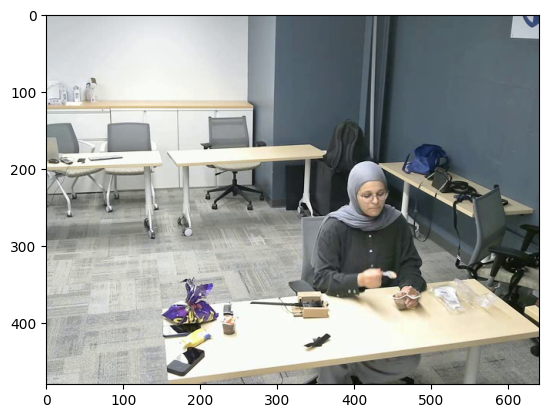

[array([[[201, 200, 194],
        [201, 200, 194],
        [201, 200, 194],
        ...,
        [122,  67,  47],
        [114,  71,  42],
        [115,  72,  43]],

       [[201, 200, 194],
        [201, 200, 194],
        [201, 200, 194],
        ...,
        [123,  68,  48],
        [114,  71,  42],
        [114,  71,  42]],

       [[201, 200, 194],
        [201, 200, 194],
        [201, 200, 194],
        ...,
        [122,  72,  51],
        [113,  72,  45],
        [112,  71,  44]],

       ...,

       [[202, 207, 205],
        [208, 213, 211],
        [209, 214, 212],
        ...,
        [121, 126, 124],
        [119, 124, 122],
        [118, 123, 121]],

       [[185, 190, 188],
        [198, 203, 201],
        [194, 199, 197],
        ...,
        [124, 129, 127],
        [125, 130, 128],
        [125, 130, 128]],

       [[201, 206, 204],
        [213, 218, 216],
        [196, 201, 199],
        ...,
        [126, 131, 129],
        [128, 133, 131],
        [130, 135, 133]

In [34]:
keypoint_tofile(output, file, curr_frames, True)
print(curr_frames)
print(type(curr_frames))